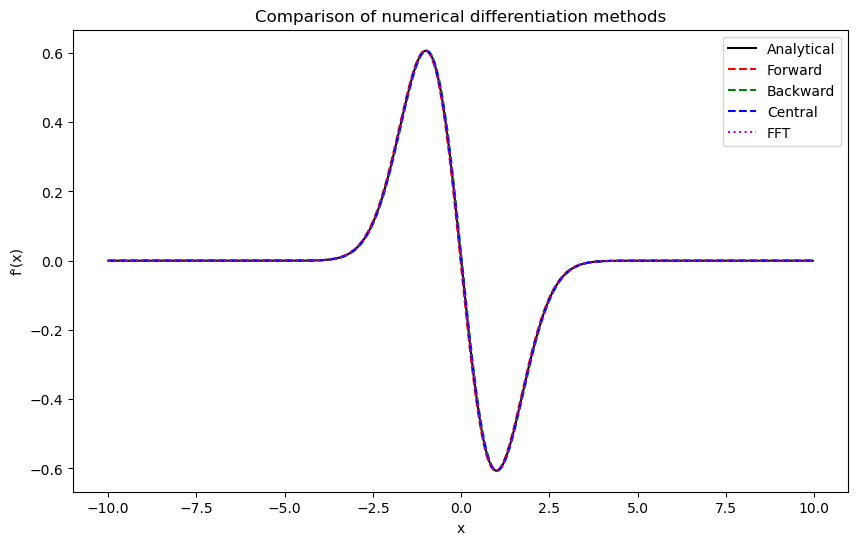

L2 errors:
Forward = 5.03e-03, Backward = 5.03e-03, Central = 1.04e-04, FFT = 1.90e-15


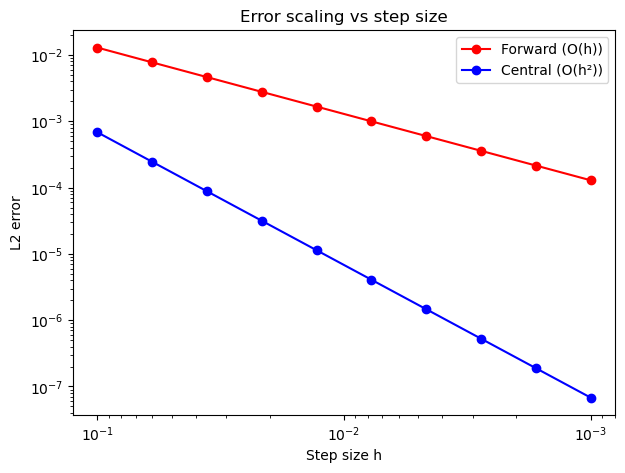

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sigma = 1.0
N = 512 # number of points
L = 10 # interval [-L, L]
x = np.linspace(-L, L, N, endpoint=False)
dx = x[1] - x[0]

# Function and analytic derivate 
f = np.exp(-x**2 / (2*sigma**2))
f_true = -x / (sigma**2) * np.exp(-x**2 / (2*sigma**2))  # analytic derivate

# Forward e Backward difference
def forward_diff(f, dx):
    df = np.zeros_like(f)
    df[:-1] = (f[1:] - f[:-1]) / dx
    df[-1] = df[-2]  # bordo
    return df

def backward_diff(f, dx):
    df = np.zeros_like(f)
    df[1:] = (f[1:] - f[:-1]) / dx
    df[0] = df[1]  # bordo
    return df

fwd = forward_diff(f, dx)
bwd = backward_diff(f, dx)

# Central difference
def central_diff(f, dx):
    df = np.zeros_like(f)
    df[1:-1] = (f[2:] - f[:-2]) / (2*dx)
    df[0] = df[1]
    df[-1] = df[-2]
    return df

ctr = central_diff(f, dx)

# Fourier differentiation
# q -- spacial frequency
q = np.fft.fftfreq(N, d=dx) * 2*np.pi
F = np.fft.fft(f)
df_fft = np.fft.ifft(1j * q * F).real  # derivate through FFT

# Comparison
plt.figure(figsize=(10,6))
plt.plot(x, f_true, 'k', label='Analytical')
plt.plot(x, fwd, '--r', label='Forward')
plt.plot(x, bwd, '--g', label='Backward')
plt.plot(x, ctr, '--b', label='Central')
plt.plot(x, df_fft, ':m', label='FFT')
plt.legend()
plt.title("Comparison of numerical differentiation methods")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.show()

# Global error (norm L2)
err_fwd = np.sqrt(np.mean((fwd - f_true)**2))
err_bwd = np.sqrt(np.mean((bwd - f_true)**2))
err_ctr = np.sqrt(np.mean((ctr - f_true)**2))
err_fft = np.sqrt(np.mean((df_fft - f_true)**2))

print(f"L2 errors:\nForward = {err_fwd:.2e}, Backward = {err_bwd:.2e}, Central = {err_ctr:.2e}, FFT = {err_fft:.2e}")

hs = np.logspace(-3, -1, 10)
err_fwd_list, err_ctr_list = [], []
for h in hs:
    xh = np.arange(-L, L, h)
    fh = np.exp(-xh**2 / (2*sigma**2))
    df_true_h = -xh / (sigma**2) * np.exp(-xh**2 / (2*sigma**2))
    df_fwd_h = (np.roll(fh, -1) - fh)[:-1] / h
    df_ctr_h = (np.roll(fh, -1) - np.roll(fh, 1))[1:-1] / (2*h)
    err_fwd_list.append(np.sqrt(np.mean((df_true_h[:-1]-df_fwd_h)**2)))
    err_ctr_list.append(np.sqrt(np.mean((df_true_h[1:-1]-df_ctr_h)**2)))

plt.figure(figsize=(7,5))
plt.loglog(hs, err_fwd_list, 'r-o', label='Forward (O(h))')
plt.loglog(hs, err_ctr_list, 'b-o', label='Central (O(h²))')
plt.gca().invert_xaxis()
plt.xlabel("Step size h")
plt.ylabel("L2 error")
plt.legend()
plt.title("Error scaling vs step size")
plt.show()


### Numerical Differentiation

**Step size ($\Delta x$)**  
   A smaller $\Delta x$ increases the number of sampling points and extends the highest representable frequency (`q_max = π/Δx`), improving the accuracy of the numerical derivative.  
   For smooth and well-sampled functions like the Gaussian, the error decreases *exponentially* (spectral convergence) with smaller $\Delta x$ much faster than the polynomial decrease observed in finite-difference methods.

**Interval size (L)**  
Since the FFT assumes the function is periodic over [-L, L], the interval must be large enough that f(x) $\approx$ 0 at the boundaries.  
If L is too small, the tails of the Gaussian wrap around, introducing discontinuities and large oscillations in f′(x).  
Choosing L $\ge $ 5σ ensures negligible boundary effects.

**Comparison:**  
- Forward and backward differences: error $\propto $ O($\Delta x$)  
- Central difference: error $\propto $ O($\Delta x^2$)  
- Fourier differentiation: error $\approx $ $10^{-15}$ (machine precision for smooth, well-sampled f)
